In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import seaborn as sns

# PE06 Hrishikesh Vaze
### DWDM - Lab 1 - Some basic operations for Data Preprocessing

# Series

In [2]:
sl1 = pd.Series(np.array([10,20,30,40,50]))
print(sl1)

0    10
1    20
2    30
3    40
4    50
dtype: int32


In [3]:
sl3 =pd.Series( {
    'a': [1,2,3],
    'b': [4,5,6],
})
print(sl3)

a    [1, 2, 3]
b    [4, 5, 6]
dtype: object


In [4]:
# disct as index - item pair

countries = {
    'India': 'Japan',
    'UK' : 'Singapore',
    'USA': 'China',
}

sl4 = pd.Series(countries)

print(sl4)

India        Japan
UK       Singapore
USA          China
dtype: object


In [5]:
print (sl1[2:4])

2    30
3    40
dtype: int32


In [6]:
print(sl4['India'])

Japan


# Dataframe

In [7]:
#empty dataset

edf = pd.DataFrame()
print(edf)


Empty DataFrame
Columns: []
Index: []


In [8]:
#creating Dataframe
caps = {
    'Gujarat' : ['Gandhinagar', 'Vadodara', 'Ahemdabad', 'Valsad'],
    'Maharashtra' : ['Mumbai', 'Nashik', 'Nagar', 'Pune'],
    'Rajasthan': ['Jaipur', 'Kota', 'Jeselmer', 'Udaipur'],
}

sl5 = pd.DataFrame(caps, index = [f'ROW {i}' for i in range(len(caps['Gujarat']))])

print(sl5)


           Gujarat Maharashtra Rajasthan
ROW 0  Gandhinagar      Mumbai    Jaipur
ROW 1     Vadodara      Nashik      Kota
ROW 2    Ahemdabad       Nagar  Jeselmer
ROW 3       Valsad        Pune   Udaipur


In [9]:
marks = [[90,91,97], [92,81,96], [89,91,88], [81,71,67] , [94,95,99]]
df2 = pd.DataFrame(
    marks, 
    columns = ['Maths', 'Science', 'Hindi'], 
    index = ['Arnab', 'Ramit','Samridhi','Riya','Mallika'])
print(df2)

          Maths  Science  Hindi
Arnab        90       91     97
Ramit        92       81     96
Samridhi     89       91     88
Riya         81       71     67
Mallika      94       95     99


In [10]:
# filter a column
print(df2.filter(['Maths', 'Science']))

          Maths  Science
Arnab        90       91
Ramit        92       81
Samridhi     89       91
Riya         81       71
Mallika      94       95


In [11]:
# filter marks : maths > 90
print(df2[ df2['Maths'] > 90])

         Maths  Science  Hindi
Ramit       92       81     96
Mallika     94       95     99


In [12]:
# ascending order
print(df2.sort_values(by = 'Science'))

          Maths  Science  Hindi
Riya         81       71     67
Ramit        92       81     96
Arnab        90       91     97
Samridhi     89       91     88
Mallika      94       95     99


In [13]:
# desceding order
print(df2.sort_values(by = 'Science', ascending = False))

          Maths  Science  Hindi
Mallika      94       95     99
Arnab        90       91     97
Samridhi     89       91     88
Ramit        92       81     96
Riya         81       71     67


In [14]:
# mean of marks subject wise
print(df2.mean())

Maths      89.2
Science    85.8
Hindi      89.4
dtype: float64


In [15]:
# mean of student wise
print(df2.mean(axis = 1))

Arnab       92.666667
Ramit       89.666667
Samridhi    89.333333
Riya        73.000000
Mallika     96.000000
dtype: float64


In [16]:
print(df2.groupby('Maths'))

In [17]:
gg = {
    'A' : pd.Series([10, 5], index=[0,1]),
    'B' : pd.Series([20, 10], index=[0,1]),
    'C' : pd.Series([22.1], index=[1]),
}

df6 = pd.DataFrame(gg)

print(df6)

    A   B     C
0  10  20   NaN
1   5  10  22.1


In [18]:
ipl_ds = pd.read_csv('../datasets/matches.csv')
ipl_ds.shape

(756, 18)

In [19]:
ipl_ds.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [20]:
ipl_ds.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [21]:
ipl_ds.size

13608

In [22]:
ipl_ds.ndim

2

In [23]:
ipl_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [24]:
ipl_ds.iloc[:3,2:5]

,city,date,team1
0,Hyderabad,05-04-2017,Sunrisers Hyderabad
1,Pune,06-04-2017,Mumbai Indians
2,Rajkot,07-04-2017,Gujarat Lions


In [25]:
ipl_ds.loc[:3,['city', 'date']]

,city,date
0,Hyderabad,05-04-2017
1,Pune,06-04-2017
2,Rajkot,07-04-2017
3,Indore,08-04-2017


In [26]:
ipl_ds["win_by_wickets"].mean()

3.3505291005291005

In [27]:
ipl_ds["win_by_wickets"].min()

0

In [28]:
ipl_ds["win_by_wickets"].max()

10

In [29]:
# standard deviation
ipl_ds["win_by_wickets"].std()

3.3879626784264194

In [30]:
ipl_ds.mean()

C:\Users\hrish\AppData\Local\Temp/ipykernel_2536/781722824.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ipl_ds.mean()


id                1792.178571
season            2013.444444
dl_applied           0.025132
win_by_runs         13.283069
win_by_wickets       3.350529
dtype: float64

In [31]:
ipl_ds.max()

C:\Users\hrish\AppData\Local\Temp/ipykernel_2536/651596764.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ipl_ds.max()


id                              11415
season                           2019
date                       31-05-2008
team1             Sunrisers Hyderabad
team2             Sunrisers Hyderabad
toss_winner       Sunrisers Hyderabad
toss_decision                   field
result                            tie
dl_applied                          1
win_by_runs                       146
win_by_wickets                     10
venue                Wankhede Stadium
dtype: object

In [32]:
ipl_ds.min()

C:\Users\hrish\AppData\Local\Temp/ipykernel_2536/2198355858.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ipl_ds.min()


id                                  1
season                           2008
date                       01-04-2010
team1             Chennai Super Kings
team2             Chennai Super Kings
toss_winner       Chennai Super Kings
toss_decision                     bat
result                      no result
dl_applied                          0
win_by_runs                         0
win_by_wickets                      0
venue                ACA-VDCA Stadium
dtype: object

In [33]:
ipl_ds.std()

C:\Users\hrish\AppData\Local\Temp/ipykernel_2536/2052000119.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ipl_ds.std()


id                3464.478148
season               3.366895
dl_applied           0.156630
win_by_runs         23.471144
win_by_wickets       3.387963
dtype: float64

In [34]:
ipl_ds.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [35]:
ipl_ds.describe() # all stats

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [36]:
# sum of missing values group by col wise
ipl_ds.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [37]:
# this means dataset has atleast one missing value
ipl_ds.isnull().values.any()

True

In [38]:
# put all missing values to mode (city)
mode_city = ipl_ds['city'].mode()[0]
ipl_ds['city'].fillna(mode_city, inplace=True)

In [39]:
ipl_ds['winner'].fillna(99)

0              Sunrisers Hyderabad
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
751                 Mumbai Indians
752                 Mumbai Indians
753                 Delhi Capitals
754            Chennai Super Kings
755                 Mumbai Indians
Name: winner, Length: 756, dtype: object

In [40]:
# select categorical cols
categorical_vars = [i for i in ipl_ds.columns if ipl_ds[i].dtype == 'object']
categorical_vars

['city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'winner',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

# SKLEARN

## LabelEncoder : Bank CSV

In [41]:
bank_df = pd.read_csv('../datasets/bank.csv', sep = ';')
print(f'Missing values in bank dataset : {bank_df.isnull().values.any()}')
bank_df.head()

Missing values in bank dataset : False


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [42]:
bank_categorical_vars = [i for i in bank_df.columns if bank_df[i].dtype == 'object']
bank_categorical_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [43]:
le = LabelEncoder()
bank_df['encoded_job'] = le.fit_transform(bank_df['job'])
bank_df[['job', 'encoded_job']].head()

,job,encoded_job
0,unemployed,10
1,services,7
2,management,4
3,management,4
4,blue-collar,1


## LabelEncoder : Adult CSV , Duplicate Tuple

In [44]:
adult_df = pd.read_csv('../datasets/adult.data', sep = ',', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary'])
print(f'Shape: {adult_df.shape}')
adult_df.head(n=2)

Shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [45]:
# tuple duplication
adult_df.duplicated(subset=None, keep=False).value_counts()

False    32514
True        47
dtype: int64

In [46]:
### Removing the duplicates
print(f'Old Shape: {adult_df.shape}')
adult_df = adult_df[ ~ adult_df.duplicated(subset=None, keep=False)]
print(f'New Shape: {adult_df.shape}')

Old Shape: (32561, 15)
New Shape: (32514, 15)


## Delta Transformation : Normalisation

In [47]:
wine_df = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', 
    header=None,
    usecols=[0,1,2],
    names=['class', 'alcohol', 'malic_acid'])
print(f'Shape: {wine_df.shape}')
wine_df.head(n=3)

Shape: (178, 3)


,class,alcohol,malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36


In [48]:
scaler = MinMaxScaler() # initialise scaler

In [49]:
scaler.fit_transform(wine_df[['alcohol', 'malic_acid']]) # normalisation

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.

In [50]:
standard_scaler = StandardScaler()

In [51]:
standard_scaler.fit_transform(wine_df[['alcohol', 'malic_acid']]) # z - transform normalisation

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

# Correlation Matrix : Diabetes Dataset

## Heatmap : show full matrix

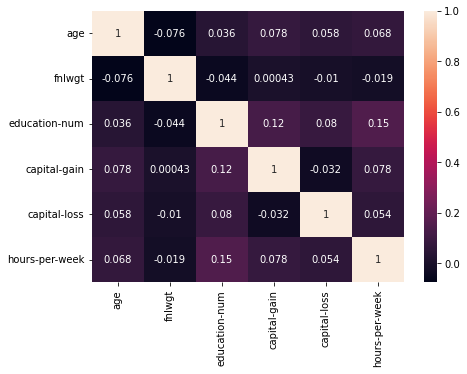

In [61]:
correlation_matrix = adult_df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Histogram

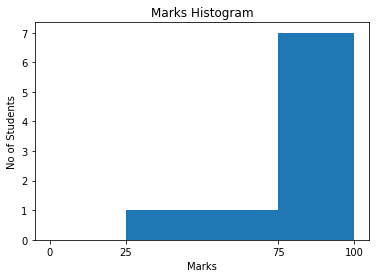

In [66]:
marks = np.array([90, 91, 97, 81, 71, 94, 95, 99])
fig, ax = plt.subplots()
ax.hist(marks, bins=[0,25,75,100])
ax.set_xticks([0,25,75,100])
ax.set_title('Marks Histogram')
ax.set_xlabel('Marks')
ax.set_ylabel('No of Students')
plt.show()